# Código para simulación de dispositivo MuTe en 2 dimensiones

**Resumen**: La idea de este código consiste en la simulación de un dispositivo para el análisis de la determinación de la dirección de partículas entrantes en un detector en dos dimensiones que consiste de un par de líneas paralelas que contienen $N_x$ pixeles, de tamaños $d$ (en cm) y los cuales están separados una distancia $D$ (en cm). El siguiente código está construido a partir de un código proporcionado y ya existente, se ha modificado y optimizado para reproducir los resultados analíticos más precisamente. La trayectoria del muon está determinada por su dirección, $\tan\theta$, cuyo ángulo de incidencia es $\theta$, iluminando un pixel $i$ en la placa frontal y un pixel $k$ en la placa posterior.

Cargamos las librerias necesarias

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

Definamos la geometría del detector, el mismo puede verse esquemáticamente como en la figura siguiente

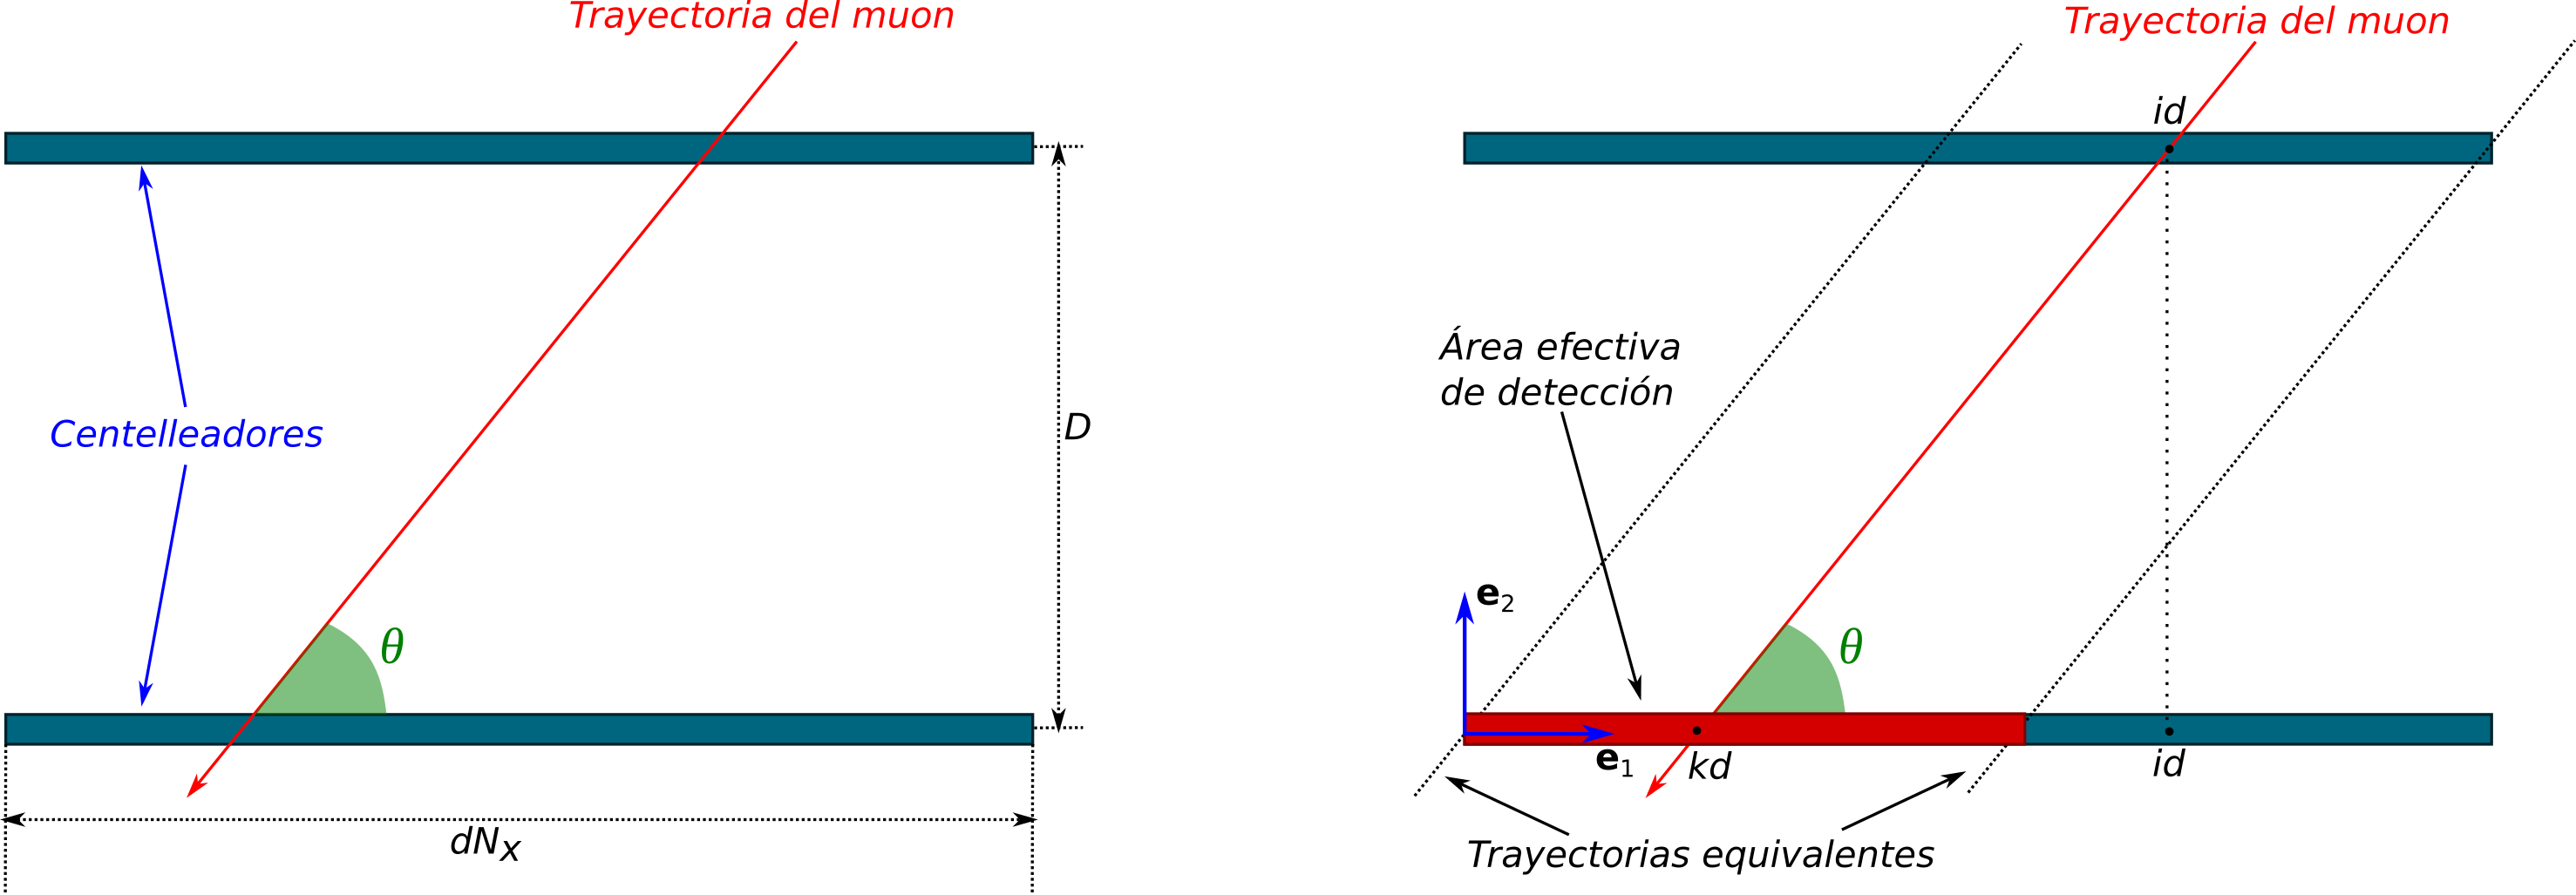

In [20]:
from IPython.display import Image
Image(filename='fig11.png', width=900)

Si colocamos el sistema de referencia en el dispositivo como en la figura anterior, entonces la trayectoria del muón está dada por 
\begin{equation}
\vec r=(i-k)d{\bf e}_1+D{\bf e}_2=D\cot\theta{\bf e}_1+D{\bf e}_2.
\end{equation}

In [21]:
Nx = input("Numero de Barras: Nx=")
d = input("Ancho de las Barras (cm): d=")
D = input("Separacion de los Paneles (cm): D=")

Numero de Barras: Nx=30
Ancho de las Barras (cm): d=5
Separacion de los Paneles (cm): D=120


Construyendo el detector...

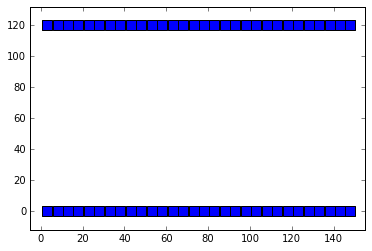

In [22]:
PArriba = [-d*(x-Nx)-d/2 for x in range(Nx) ]
PAbajo = [-d*(x-Nx)-d/2 for x in range(Nx) ]
Normal = np.zeros(Nx) 
# Se pintan con los colores de no-deteccion
ColorArriba= ['b' for x in range(Nx) ]
ColorAbajo= ['b' for x in range(Nx) ]
# Construyendo el esquema del detector
plt.scatter(PArriba, Normal +D, marker="s", c=ColorArriba,  s=100)
plt.scatter(PAbajo, Normal, marker="s",  c=ColorAbajo,  s=100)
# Limites de graficacion
plt.ylim([0 -D/10., D*(1. +1/10.)])
plt.xlim([-d, d*Nx+d])
plt.show()

El ángulo de inclinación mínimo en el cual un muon puede entrar haciendo coincidencia en la placa frontal y posterior para este detector en particular es de $\theta_{min}=\arctan\left(\frac{D}{d\cdot N_x}\right)$

In [23]:
theta_min=math.degrees(math.atan(D*1./(d*Nx)))
print('El angulo minimo para coincidencia en pixeles iluminados en este detector es de: '+ str(theta_min))
print('Rango para el angulo de entrada: '+ str([theta_min,180-theta_min]))

El angulo minimo para coincidencia en pixeles iluminados en este detector es de: 38.6598082541
Rango para el angulo de entrada: [38.659808254090095, 141.34019174590992]


Vamos a introducir una dirección particular para un muón incidente con ángulo $\theta$, tal que $\theta_{min}<\theta<180-\theta_{min}$.

In [24]:
def Validoangulo(theta) :
    if theta < theta_min or theta > 180-theta_min :
         print ("El angulo está fuera de rango!!!")
    return 

In [25]:
theta = input("Indique la direccion de ingreso del Muon: theta=")
Validoangulo(theta)

Indique la direccion de ingreso del Muon: theta=56


Se iluminan los puntos que corresponden a direcciones equivalentes

In [26]:
DeltaXIngreso = int((D*math.cos(math.radians((theta)))/(math.sqrt(1-(math.cos(math.radians((theta))))**2))))
XIngreso=(DeltaXIngreso+d/2)/d
print ('El Delta Ingreso es: m=(i-k)='+ str(XIngreso))
for iBar in range(Nx) :
    if iBar+XIngreso < Nx  and iBar+XIngreso >= 0 :
        ColorArriba[iBar-Nx]="r"
        ColorAbajo[iBar+XIngreso]="r"        
    else : continue

El Delta Ingreso es: m=(i-k)=16


Se imprime el area de deteccion 

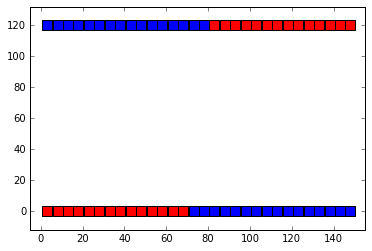

El area (cm) que determina la trayectoria del muon es: 70


In [27]:
plt.scatter(PArriba, Normal +D, marker="s", c=ColorArriba,  s=100)
plt.scatter(PAbajo, Normal, marker="s",  c=ColorAbajo,  s=100)
plt.ylim([0 -D/10., D*(1. +1/10.)])
plt.xlim([-d, d*Nx+d])
plt.show()
Area=(d*(Nx-np.abs(XIngreso)))
print ('El area (cm) que determina la trayectoria del muon es: '+ str(Area))